In [4]:
import os

import pandas as pd
import seaborn as sns
import snowflake.connector
from dotenv import load_dotenv
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine

load_dotenv()

engine = create_engine(
    os.getenv('DB_URL')
)

connection = engine.connect()

### Sales By Month

In [2]:
query = '''
select
    sales_month,
    sales

from
    ANALYTICS.DEMO.us_retail_sales

where
    kind_of_business = 'Retail and food services sales, total'
'''

df = pd.read_sql(query, connection)
sns.lineplot(data=df, x="sales_month", y="sales")

### Sales By Year

<AxesSubplot:xlabel='sales_year', ylabel='sales'>

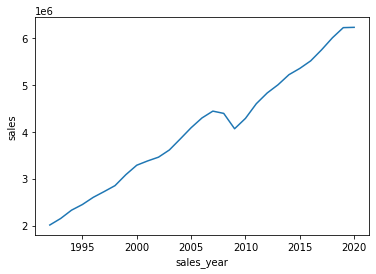

In [8]:
query = '''
select
    date_part('year', sales_month) as sales_year,
    sum(sales) as sales

from
    ANALYTICS.DEMO.us_retail_sales

where
    kind_of_business = 'Retail and food services sales, total'

group by 
    1
'''

df = pd.read_sql(query, connection)
sns.lineplot(data=df, x="sales_year", y="sales")

### Sales by business by year

<AxesSubplot:xlabel='sales_year', ylabel='sales'>

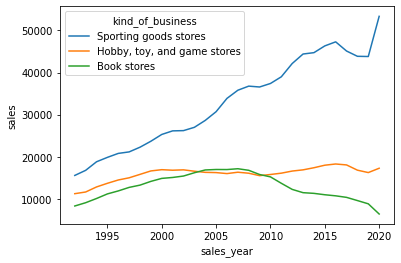

In [5]:
query = '''
select
    date_part('year', sales_month) as sales_year,
    kind_of_business,
    sum(sales) as sales

from
    ANALYTICS.DEMO.us_retail_sales

where
    kind_of_business in (
        'Hobby, toy, and game stores',
        'Book stores',
        'Sporting goods stores'
    )

group by 
    1, 2
'''

df = pd.read_sql(query, connection)
sns.lineplot(data=df, x="sales_year", y="sales", hue='kind_of_business')